In [63]:
'''>>>>> start CodeP4.2F25
    V.P. Carey ME249, Fall 2025 

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Import normalized data from CodeP4.3F25.ipynb
# Run CodeP4.3F25.ipynb to load and normalize data
%run CodeP4.3F25.ipynb

# Data loaded from CodeP4.3F25.ipynb:
# xarray, yarray (training set - normalized)
# xarray_val, yarray_val (validation set - normalized)
# Tamed, IDmed, RLmed, VLmed, Wdmed (median values for denormalization)

print(f'Training set shape: {xarray.shape}')
print(f'Validation set shape: {xarray_val.shape}')

[[0.0, 10.0, 200.0, 24.3], [1.0, 10.0, 200.0, 24.3], [2.0, 10.0, 200.0, 24.3], [0.0, 10.0, 200.0, 51.8], [1.0, 10.0, 200.0, 51.8], [2.0, 10.0, 200.0, 51.8], [0.0, 10.0, 200.0, 96.2], [1.0, 10.0, 200.0, 96.2], [2.0, 10.0, 200.0, 96.1], [0.0, 10.0, 200.0, 170.1], [1.0, 10.0, 200.0, 170.1], [2.0, 10.0, 200.0, 170.1], [0.0, 10.0, 500.0, 7.0], [1.0, 10.0, 500.0, 7.0], [2.0, 10.0, 500.0, 7.0], [0.0, 10.0, 500.0, 21.2], [1.0, 10.0, 500.0, 21.2], [2.0, 10.0, 500.0, 21.2], [0.0, 10.0, 500.0, 43.2], [1.0, 10.0, 500.0, 43.2], [1.0, 10.0, 700.0, 4.9], [2.0, 10.0, 700.0, 4.9], [0.0, 10.0, 700.0, 14.3], [1.0, 10.0, 700.0, 14.3], [2.0, 10.0, 700.0, 14.3], [2.0, 10.0, 500.0, 43.2], [0.0, 10.0, 500.0, 79.1], [1.0, 10.0, 500.0, 79.1], [2.0, 10.0, 500.0, 79.1], [0.0, 10.0, 700.0, 4.8], [0.0, 10.0, 700.0, 29.7], [1.0, 10.0, 700.0, 29.7], [2.0, 10.0, 700.0, 29.7], [0.0, 10.0, 700.0, 55.3], [1.0, 10.0, 700.0, 55.3], [2.0, 10.0, 700.0, 55.3], [0.0, 10.0, 1000.0, 3.92], [1.0, 10.0, 1000.0, 3.92], [2.0, 10.0, 

In [64]:
# (c) Define neural network model

# Network architecture based on Task 4.1.1 experience:
# - 3 hidden layers (optimal for small datasets)
# - 8-14-8 structure (moderate complexity to avoid overfitting)
# - ELU activation for hidden layers
# - Linear activation for output layer (regression task)

from keras import backend as K

# Initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval=-0.2, maxval=0.5)

# Input: 4 features [M, T_air_norm, I_D_norm, R_L_norm]
# Output: 2 parameters [V_L_norm, W_dot_norm]
model = keras.Sequential([
    keras.layers.Dense(8, activation='elu', input_shape=[4], kernel_initializer=initializer),
    keras.layers.Dense(24, activation='elu', kernel_initializer=initializer),
    keras.layers.Dense(14, activation='elu', kernel_initializer=initializer),
    keras.layers.Dense(2, kernel_initializer=initializer)
])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 24)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 14)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 2)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636 (2.48 KB)

 Trainable params: 636 (2.48 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
#We're using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It's one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that's reliable and fast.
#We're compiling the mode using the model.compile function. The loss function used here 
#is mean absolute error. After the compilation of the model, we'll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.0006)
model.compile(loss='mean_absolute_error', optimizer=rms)

In [66]:
#After the compilation of the model, we'll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I'd give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback - monitor validation loss
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience=100, 
    restore_best_weights=True, 
    verbose=1)

# Add a checkpoint where validation loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint(
    'best_model_4.2.keras', 
    monitor='val_loss', 
    mode='min',  
    verbose=1, 
    save_best_only=True)

historyData = model.fit(
    xarray, yarray,
    validation_data=(xarray_val, yarray_val),
    epochs=3000,
    callbacks=[es, mc])

loss_hist = historyData.history['loss']
val_loss_hist = historyData.history['val_loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(val_loss_hist) + 1
print('best epoch = ', best_epoch)
print('smallest training loss =', np.min(loss_hist))
print('smallest validation loss =', np.min(val_loss_hist))

model.save('./best_model_4.2.keras')

Epoch 1/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 4.4909
Epoch 1: val_loss improved from None to 4.22466, saving model to best_model_4.2.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 4.4909 - val_loss: 4.2247
Epoch 2/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1443
Epoch 2: val_loss improved from 4.22466 to 3.97065, saving model to best_model_4.2.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 4.1443 - val_loss: 3.9706
Epoch 3/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9062
Epoch 3: val_loss improved from 3.97065 to 3.76597, saving model to best_model_4.2.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.9062 - val_loss: 3.7660
Epoch 4/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7144
Epoch 4: val_loss improved from 3.76597 to 3.58994, saving model to best_model_4.2.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.7144 - val_loss: 3.5899
Epoch 5/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5495
Epoch 5: val_loss improved from

In [67]:
# Training set predictions

train_predictions = model.predict(xarray)

# Denormalize predictions
train_pred_VL = train_predictions[:, 0] * VLmed
train_pred_Wd = train_predictions[:, 1] * Wdmed

# Denormalize actual values
train_actual_VL = yarray[:, 0] * VLmed
train_actual_Wd = yarray[:, 1] * Wdmed

# Calculate MAE
mae_train_VL = np.mean(np.abs(train_pred_VL - train_actual_VL))
mae_train_Wd = np.mean(np.abs(train_pred_Wd - train_actual_Wd))

print('============================================================')
print('Training Set Prediction Results')
print('============================================================')
print(f'Training MAE - Voltage VL: {mae_train_VL:.4f} V')
print(f'Training MAE - Power Wd: {mae_train_Wd:.4f} W')
print('============================================================')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Training Set Prediction Results
Training MAE - Voltage VL: 14.1989 V
Training MAE - Power Wd: 65.1097 W


In [68]:
# Validation set predictions

val_predictions = model.predict(xarray_val)

# Denormalize predictions
val_pred_VL = val_predictions[:, 0] * VLmed
val_pred_Wd = val_predictions[:, 1] * Wdmed

# Denormalize actual values
val_actual_VL = yarray_val[:, 0] * VLmed
val_actual_Wd = yarray_val[:, 1] * Wdmed

# Calculate MAE
mae_val_VL = np.mean(np.abs(val_pred_VL - val_actual_VL))
mae_val_Wd = np.mean(np.abs(val_pred_Wd - val_actual_Wd))

print('============================================================')
print('Validation Set Prediction Results')
print('============================================================')
print(f'Validation MAE - Voltage VL: {mae_val_VL:.4f} V')
print(f'Validation MAE - Power Wd: {mae_val_Wd:.4f} W')
print('============================================================')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Validation Set Prediction Results
Validation MAE - Voltage VL: 36.9721 V
Validation MAE - Power Wd: 250.8151 W


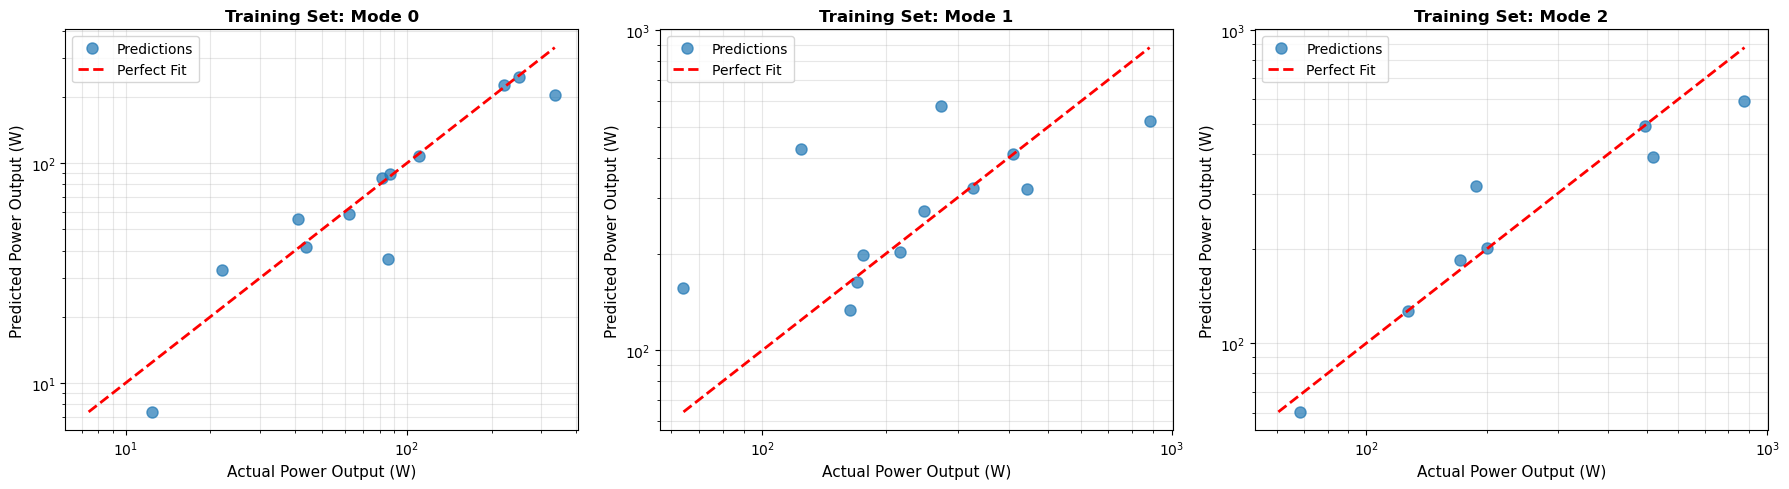

Figure saved as: task4.2_training_loglog.png


In [69]:
# (e) Log-log plots of predicted vs actual power output for training set
# Create separate plots for each Mode (0, 1, 2)

import matplotlib.pyplot as plt

# Create 3 subplots for 3 modes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mode labels
mode_names = ['Mode 0', 'Mode 1', 'Mode 2']

for mode_idx in range(3):
    ax = axes[mode_idx]
    
    # Filter data for this mode
    mask = xarray[:, 0] == mode_idx
    actual = train_actual_Wd[mask]
    predicted = train_pred_Wd[mask]
    
    # Log-log plot
    ax.loglog(actual, predicted, 'o', markersize=8, alpha=0.7, label='Predictions')
    
    # Perfect prediction line (y=x)
    if len(actual) > 0:
        min_val = min(actual.min(), predicted.min())
        max_val = max(actual.max(), predicted.max())
        ax.loglog([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Fit')
    
    ax.set_xlabel('Actual Power Output (W)', fontsize=11)
    ax.set_ylabel('Predicted Power Output (W)', fontsize=11)
    ax.set_title(f'Training Set: {mode_names[mode_idx]}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, which='both')
    ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('task4.2_training_loglog.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Figure saved as: task4.2_training_loglog.png')

In [70]:
# Additional analysis: Training set performance by Mode

# Calculate MAE for each mode
modes = [0, 1, 2]
print('============================================================')
print('Training Set Performance by Mode')
print('============================================================')

for mode in modes:
    mask = xarray[:, 0] == mode
    if np.any(mask):
        mode_actual_VL = train_actual_VL[mask]
        mode_pred_VL = train_pred_VL[mask]
        mode_actual_Wd = train_actual_Wd[mask]
        mode_pred_Wd = train_pred_Wd[mask]
        
        mae_VL = np.mean(np.abs(mode_pred_VL - mode_actual_VL))
        mae_Wd = np.mean(np.abs(mode_pred_Wd - mode_actual_Wd))
        
        print(f'Mode {int(mode)}:')
        print(f'  Voltage MAE: {mae_VL:.4f} V')
        print(f'  Power MAE: {mae_Wd:.4f} W')
        print(f'  Samples: {np.sum(mask)}')
        print()

print('============================================================')

Training Set Performance by Mode
Mode 0:
  Voltage MAE: 3.8633 V
  Power MAE: 19.4646 W
  Samples: 12

Mode 1:
  Voltage MAE: 20.0098 V
  Power MAE: 107.1729 W
  Samples: 12

Mode 2:
  Voltage MAE: 20.9858 V
  Power MAE: 70.4826 W
  Samples: 8



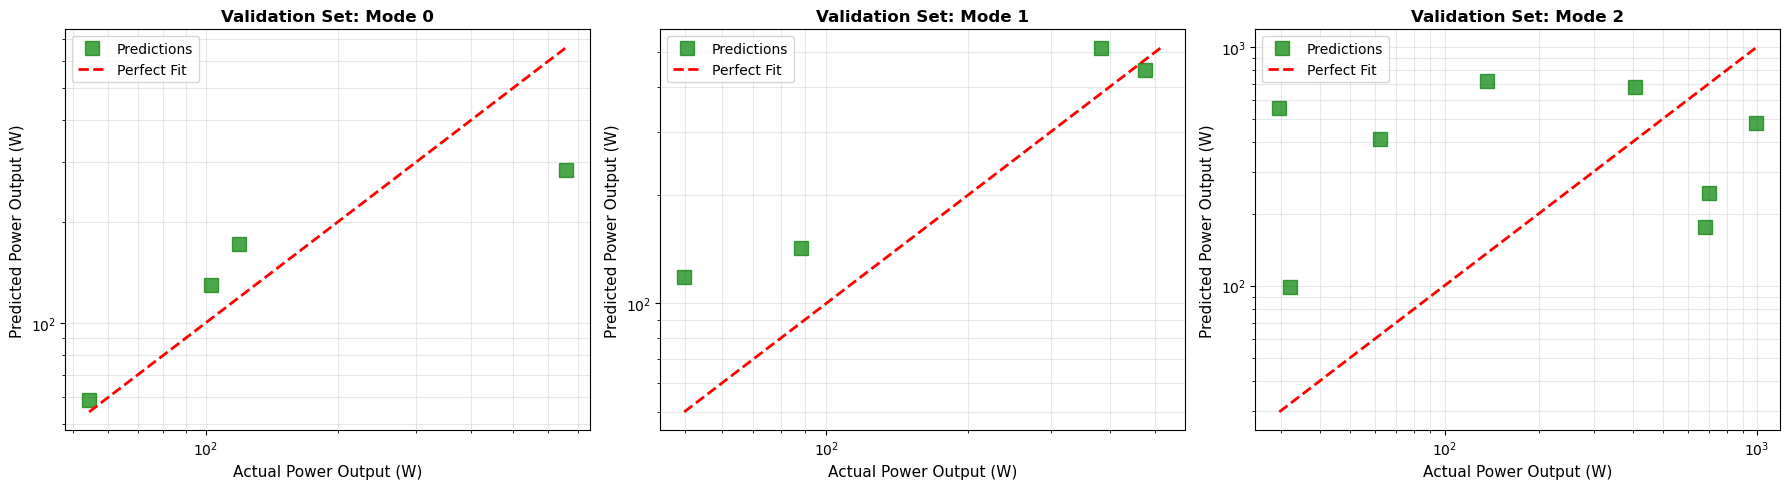

Figure saved as: task4.2_validation_loglog.png


In [71]:
# (f) Log-log plots of predicted vs actual power output for validation set
# Create separate plots for each Mode (0, 1, 2)

# Create 3 subplots for 3 modes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mode labels
mode_names = ['Mode 0', 'Mode 1', 'Mode 2']

for mode_idx in range(3):
    ax = axes[mode_idx]
    
    # Filter data for this mode
    mask = xarray_val[:, 0] == mode_idx
    actual = val_actual_Wd[mask]
    predicted = val_pred_Wd[mask]
    
    # Log-log plot
    ax.loglog(actual, predicted, 's', markersize=10, alpha=0.7, label='Predictions', color='green')
    
    # Perfect prediction line (y=x)
    if len(actual) > 0:
        min_val = min(actual.min(), predicted.min())
        max_val = max(actual.max(), predicted.max())
        ax.loglog([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Fit')
    
    ax.set_xlabel('Actual Power Output (W)', fontsize=11)
    ax.set_ylabel('Predicted Power Output (W)', fontsize=11)
    ax.set_title(f'Validation Set: {mode_names[mode_idx]}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, which='both')
    ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('task4.2_validation_loglog.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Figure saved as: task4.2_validation_loglog.png')

In [72]:
# Additional analysis: Validation set performance by Mode

# Calculate MAE for each mode in validation set
print('============================================================')
print('Validation Set Performance by Mode')
print('============================================================')

for mode in modes:
    mask = xarray_val[:, 0] == mode
    if np.any(mask):
        mode_actual_VL = val_actual_VL[mask]
        mode_pred_VL = val_pred_VL[mask]
        mode_actual_Wd = val_actual_Wd[mask]
        mode_pred_Wd = val_pred_Wd[mask]
        
        mae_VL = np.mean(np.abs(mode_pred_VL - mode_actual_VL))
        mae_Wd = np.mean(np.abs(mode_pred_Wd - mode_actual_Wd))
        
        print(f'Mode {int(mode)}:')
        print(f'  Voltage MAE: {mae_VL:.4f} V')
        print(f'  Power MAE: {mae_Wd:.4f} W')
        print(f'  Samples: {np.sum(mask)}')
        print()

print('============================================================')

Validation Set Performance by Mode
Mode 0:
  Voltage MAE: 14.3797 V
  Power MAE: 114.5755 W
  Samples: 4

Mode 1:
  Voltage MAE: 45.9497 V
  Power MAE: 70.4128 W
  Samples: 4

Mode 2:
  Voltage MAE: 43.7794 V
  Power MAE: 409.1360 W
  Samples: 8

